In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.preprocessing import image
import numpy as np

BATCH_SIZE = 64
IMG_SIZE = (128, 128)
val_split = 0.95

In [15]:
meta = {'c0': "Focussed",
         'c1' : "Text-Phone Right",
           'c2': "Talk-Phone Right", 
           'c3': "Text-Phone Left", 
           'c4': "Talk-Phone Left", 
           'c5': "Radio Adjust", 
           'c6': "Drinking", 
           'c7': "Back Seat Reach", 
           'c8': "Misc Manual", 
           'c9': "Visual"
}


In [16]:
IMG_SIZE = (128, 128)



train_dir = r"C:/Users/james/Desktop/Diss_Code_for_AUC/state-farm-distracted-driver-detection/imgs/train/"
SF_test_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE, 
                                             validation_split= 0.1, 
                                             subset= "validation", 
                                             seed = 1, 
                                             labels="inferred")

def normalize(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label
SF_test_dataset = SF_test_dataset.map(normalize)

Found 20251 files belonging to 10 classes.
Using 2025 files for validation.


In [17]:
image_folder_path = r"C:/Users/james/Desktop/Diss_Code_for_AUC/state-farm-distracted-driver-detection/imgs/Unlabled/"
testing = image_dataset_from_directory(image_folder_path,
                                             label_mode=None,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE)
def normalize(image):
    image = tf.cast(image/255.0, tf.float32)
    return image
testing = testing.map(normalize)

Found 79726 files belonging to 1 classes.


In [18]:
from keras.models import load_model
model = load_model(r"C:/Users/james/Desktop/Diss_Code_for_AUC/CNN/CNN_Models/CNN_AUC_with_weights.h5")  #CNN_AUC_It_2.h5") #my_auc_model_rect_img.h5")


In [19]:
from sklearn.metrics import accuracy_score
y_test = []
y_pred = []
for images, labels in SF_test_dataset:
    y_test.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

2/2 [==============================] - 0s 16ms/step
0.3002469135802469


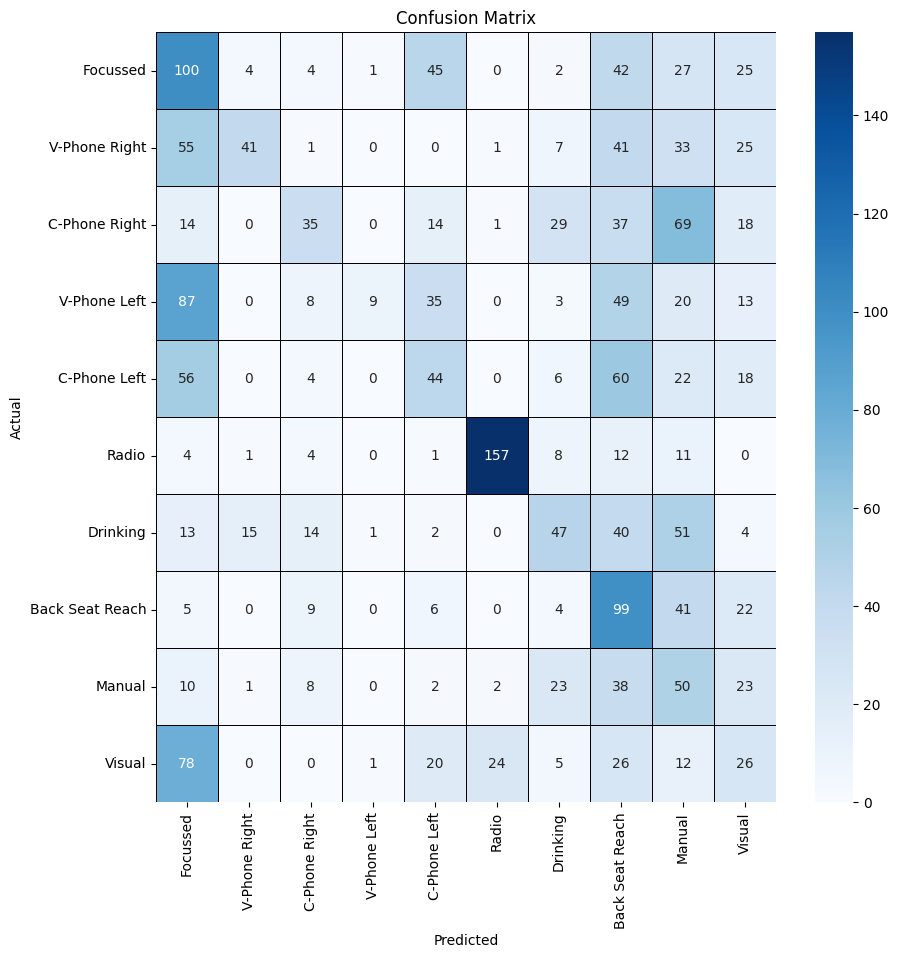

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=90)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
print("f1:        " + str(f1))
print("Precision: " + str(precision))
print("recall:    " + str(recall))

f1:        0.2902590147829134
Precision: 0.41050175151113083
recall:    0.3002469135802469


In [24]:
import pandas as pd
import numpy as np
import os
keys = list(meta.keys())
index = [0,1,2,3,4,5,6,7,8,9]
x_ticks = list(meta.values())
max_prob = []
predict_name = []
image_names = []

for images in testing.take(1):

    predictions = model.predict(images)

    for i, prediction in enumerate(predictions):
        max_prob.append(np.argmax(prediction))
        predict_name.append(meta[keys[int(max_prob[i])]])
        image_names.append(i)



image_list = os.listdir(image_folder_path  + "test")      

result_df = pd.DataFrame({'Image': image_names, 'Prediction': max_prob, 'Prediction Name': predict_name,})
result_df

2/2 [==============================] - 0s 71ms/step


,Image,Prediction,Prediction Name
0,0,0,Focussed
1,1,8,Manual
2,2,6,Drinking
3,3,8,Manual
4,4,1,V-Phone Right
...,...,...,...
59,59,0,Focussed
60,60,1,V-Phone Right
61,61,8,Manual
62,62,7,Back Seat Reach


In [25]:
meta_cls_2_num = {'c0': 0,
         'c1' : 1,
           'c2': 2, 
           'c3': 3, 
           'c4': 4, 
           'c5': 5, 
           'c6': 6, 
           'c7': 7, 
           'c8': 8, 
           'c9': 9
}

2/2 [==============================] - 0s 79ms/step


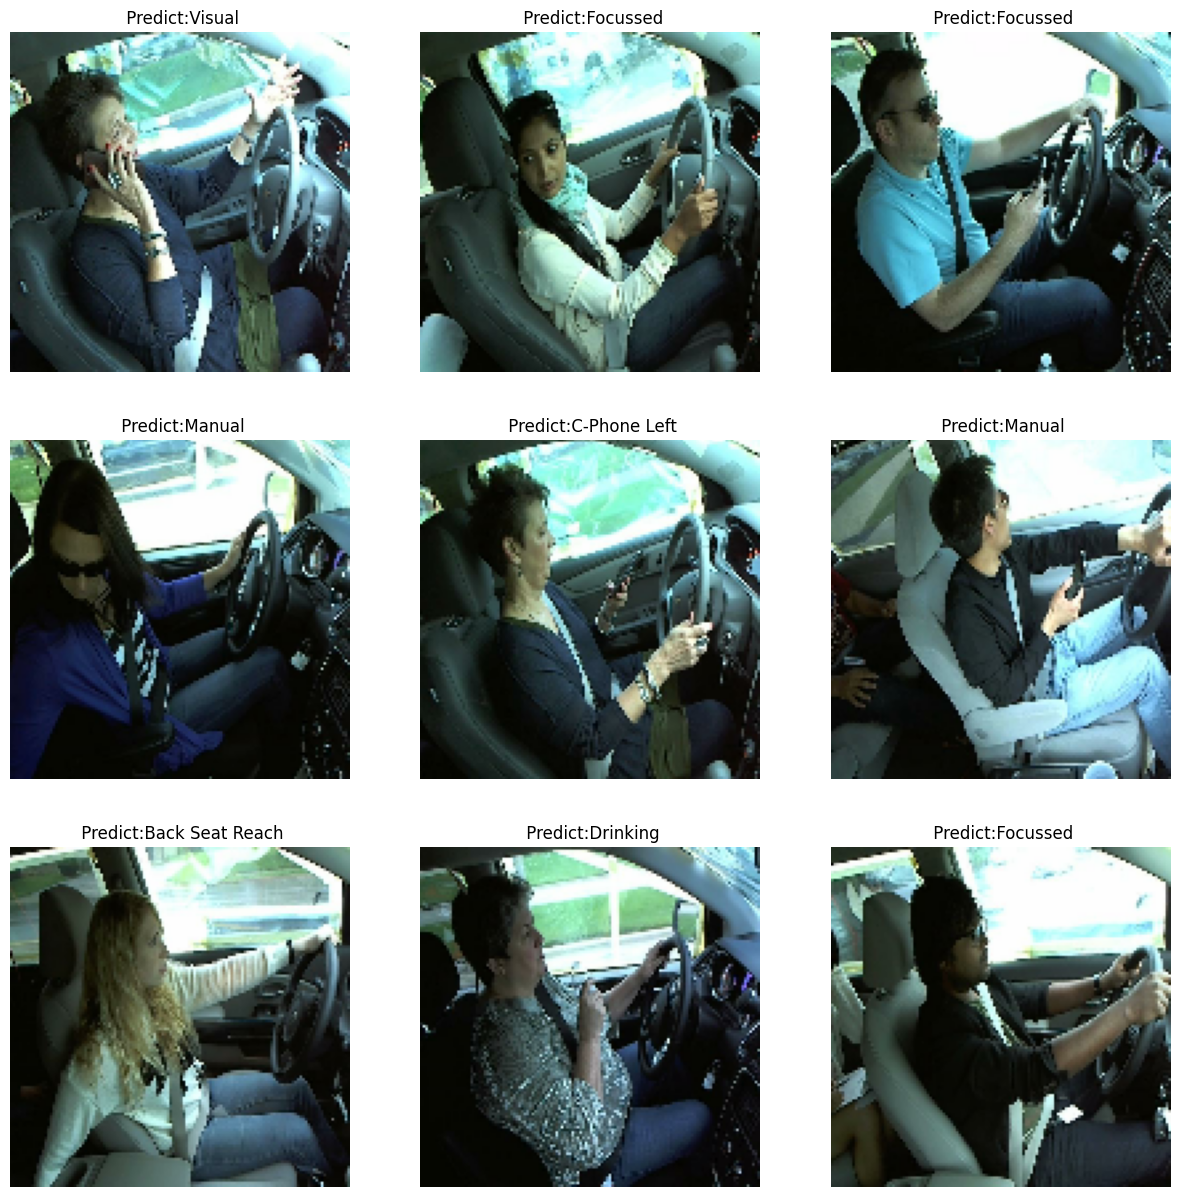

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf

keys = list(meta.keys())
new_test = testing.take(10)
index = [0,1,2,3,4,5,6,7,8,9]
x_ticks = list(meta.values())

grid_x = 3
grid_y = 3
plots = grid_x*grid_y

plt.figure(figsize=(grid_y * 5, grid_x * 5))

for images in new_test:
    predictions = model.predict(images)
    max_prob = []
    for i in predictions:
        max_prob.append(np.argmax(i))
    for i in range(plots):
        ax = plt.subplot(grid_x, grid_y, i + 1)
        plt.imshow((images[i]*255).numpy().astype("uint8"))
        plt.title(" Predict:" + meta[keys[int(max_prob[i])]])
        plt.axis("off")

plt.show()